In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from scipy.stats import norm

### Problem 2 - Gunny Bags

Given information:

In [177]:
mu = 5 # given population mean in kg/sq.cm.
sigma = 1.5 # given population standard deviation in kg/sq.cm.

In [7]:
density = pd.DataFrame()

In [8]:
density['x'] = np.linspace(0,10,100)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

Plotting the normal distribution of Breaking Strength:

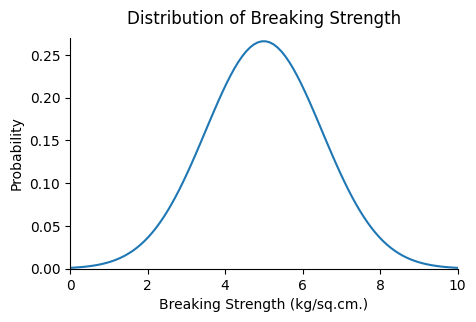

In [43]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(density['x'], density['pdf']);
plt.margins(0)
ax.set_ylabel('Probability')
ax.set_xlabel('Breaking Strength (kg/sq.cm.)')
ax.set_title('Distribution of Breaking Strength', pad=10);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([0,.27])
plt.show()

#### 2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

In [129]:
less_than_317 = round((norm.cdf(3.17, mu, sigma)),4)*100
print(f'\033[1mThe proportion of gunny bags having a breaking strength of less than 3.17 kg per sq cm is {less_than_317}%\033[1m')

The proportion of gunny bags having a breaking strength of less than 3.17 kg per sq cm is 11.12%


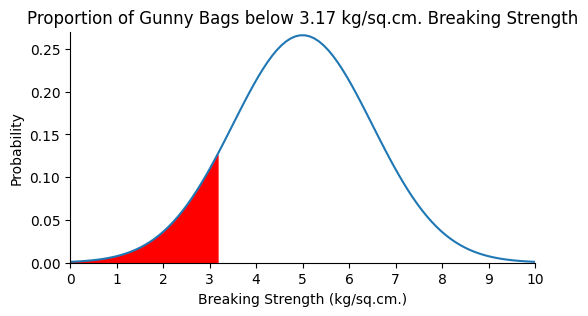

In [108]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(density['x'], density['pdf'])
# plt.axvline(x=3.17, c='r')
x1 = np.linspace(0, 3.17, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.margins(0)
ax.set_title('Proportion of Gunny Bags below 3.17 kg/sq.cm. Breaking Strength')
ax.set_ylabel('Probability')
ax.set_xlabel('Breaking Strength (kg/sq.cm.)');
plt.xticks(np.arange(0, 11, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([0,.27]);

#### 2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

In [130]:
more_than_36 = (1 - round((norm.cdf(3.6, mu, sigma)),4))*100
print(f'\033[1mThe proportion of gunny bags having a breaking strength of at least 3.6 kg per sq cm is {more_than_36}%\033[1m')

The proportion of gunny bags having a breaking strength of at least 3.6 kg per sq cm is 82.47%


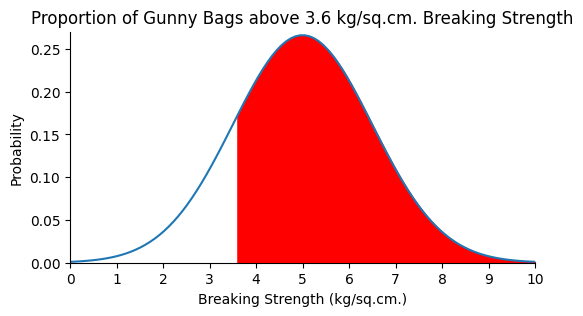

In [109]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(density['x'], density['pdf'])
# plt.axvline(x=3.6, c='r')
x1 = np.linspace(3.6, 10, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.margins(0)
ax.set_title('Proportion of Gunny Bags above 3.6 kg/sq.cm. Breaking Strength')
ax.set_ylabel('Probability')
ax.set_xlabel('Breaking Strength (kg/sq.cm.)');
plt.xticks(np.arange(0, 11, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([0,.27]);

#### 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [178]:
between_5_55 = ((norm.cdf(5.5, mu, sigma)) - (norm.cdf(5, mu, sigma)))*100
print(f'The proportion of gunny bags having a breaking strength between 5 and 5.5 kg per sq cm is {round(between_5_55,2)}%')

The proportion of gunny bags having a breaking strength between 5 and 5.5 kg per sq cm is 13.06%


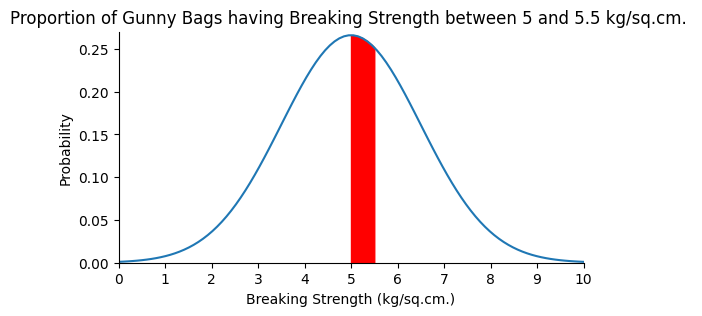

In [110]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(density['x'], density['pdf'])
# plt.axvline(x=3.6, c='r')
x1 = np.linspace(5, 5.5, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.margins(0)
ax.set_title('Proportion of Gunny Bags having Breaking Strength between 5 and 5.5 kg/sq.cm. ')
ax.set_ylabel('Probability')
ax.set_xlabel('Breaking Strength (kg/sq.cm.)');
plt.xticks(np.arange(0, 11, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([0,.27]);

#### 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [131]:
not_between = (1 - ((norm.cdf(7.5, mu, sigma)) - (norm.cdf(3, mu, sigma))))*100
print(f'\033[1mThe proportion of gunny bags having a breaking strength NOT between 3 and 7.5 kg per sq cm is {round(not_between,2)}%\033[1m')

The proportion of gunny bags having a breaking strength NOT between 3 and 7.5 kg per sq cm is 13.9%


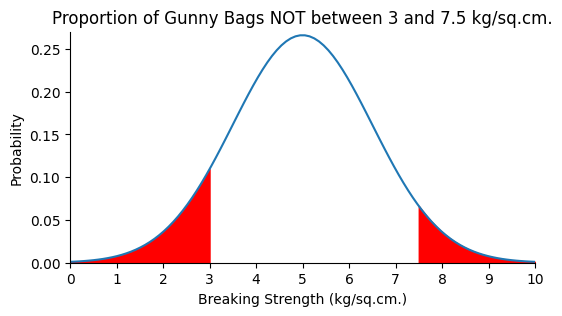

In [106]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(density['x'], density['pdf'])
x1 = np.linspace(0, 3, 50)
x2 = np.linspace(7.5, 10, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.fill_between(x2, norm.pdf(x2, mu, sigma), color='r')
plt.margins(0)
ax.set_title('Proportion of Gunny Bags NOT between 3 and 7.5 kg/sq.cm.')
ax.set_ylabel('Probability')
ax.set_xlabel('Breaking Strength (kg/sq.cm.)');
plt.xticks(np.arange(0, 11, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([0,.27]);

### Problem 3 - Zingaro

Given : For polishing the minimum Hardness Index required is 150 \
$\mu = 150$   
$\alpha = 0.05$

In [111]:
zingaro = pd.read_csv('Zingaro_Company.csv')

In [112]:
zingaro.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [113]:
zingaro.shape

(75, 2)

#### 3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

$H_0$ : Stone hardness is $\ge$ 150 \
$H_1$ : Stone hardness is $<$ 150

For this we will use a One Sample, One Tailed t-test.

In [195]:
from scipy import stats
from scipy.stats import ttest_1samp

In [138]:
t_stat, p_value = ttest_1samp(zingaro['Unpolished '], 150)
print(f'\033[1mThe t-statistic is {round(t_stat,2)} and the p-value is {round(p_value,4)}\033[1m')

The t-statistic is -4.16 and the p-value is 0.0001


**Since p-value $< \alpha$, we reject the Null Hypothesis. The stone hardness is $<$ 150 and therefore Unpolished stones are not suitable for printing.**

#### 3.2 Is the mean hardness of the polished and unpolished stones the same?

$H_0$ : $\mu_\text{polished} = \mu_\text{unpolished}$ (The mean hardness of Polished and Unpolished stones is the same) \
\
$H_1$ : $\mu_\text{polished} \ne \mu_\text{unpolished}$ (The mean hardness of Polished and Unpolished stones is different) \
\
$\alpha = 0.05$

For this we will use a Two Sample, Two Tailed t-test.

In [132]:
from scipy.stats import ttest_ind

In [140]:
t_stat1, p_value1 = ttest_ind(zingaro['Unpolished '], zingaro['Treated and Polished'])
print(f'\033[1mThe t-statistic is {round(t_stat1,2)} and the p-value is {round(p_value1,4)}\033[1m')

The t-statistic is -3.24 and the p-value is 0.0015


Since this is a two-tailed test, the p-value will be divided by 2.

In [143]:
p_value_half = round(p_value1/2,4)
print(f'\033[1mThe adjusted p-value is {p_value_half}\033[1m')

The adjusted p-value is 0.0007


**Since p-value $< \alpha$, we reject the Null Hypothesis. The mean hardness of Polished and Unpolished stones is not the same.**

### Problem 4 - Dental Implants

In [5]:
df = pd.read_excel('Dental+Hardness+data.xlsx')

In [161]:
df.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [162]:
df.shape

(90, 5)

In [14]:
df['Dentist'] = df['Dentist'].astype('category')

In [15]:
df['Method'] = pd.Categorical(df['Method'])

In [16]:
df['Alloy'] = pd.Categorical(df['Alloy'])

In [166]:
df['Dentist'].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1, 2, 3, 4, 5]

In [167]:
df['Method'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [168]:
df['Alloy'].unique()

[1, 2]
Categories (2, int64): [1, 2]

### Alloy 1

In [6]:
df1 = df[df['Alloy'] == 1]

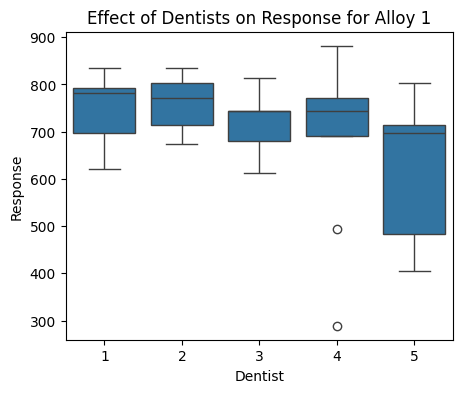

In [184]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df1, x='Dentist', y='Response');
plt.title('Effect of Dentists on Response for Alloy 1');

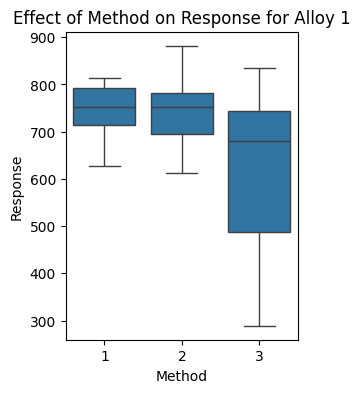

In [188]:
plt.figure(figsize=(3,4))
sns.boxplot(data=df1, x='Method', y='Response');
plt.title('Effect of Method on Response for Alloy 1');

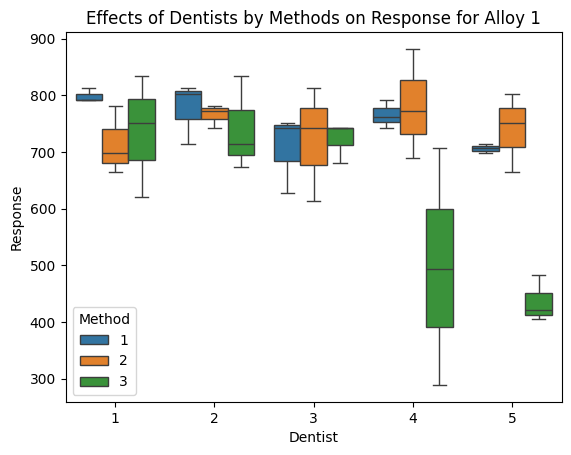

In [189]:
sns.boxplot(data=df1, x='Dentist', y='Response', hue='Method');
plt.title('Effects of Dentists by Methods on Response for Alloy 1');

### Alloy 2

In [7]:
df2 = df[df['Alloy'] == 2]

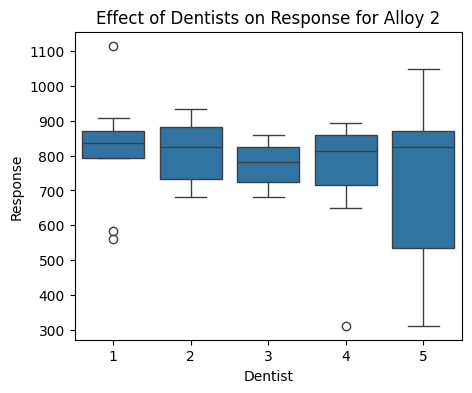

In [190]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df2, x='Dentist', y='Response');
plt.title('Effect of Dentists on Response for Alloy 2');

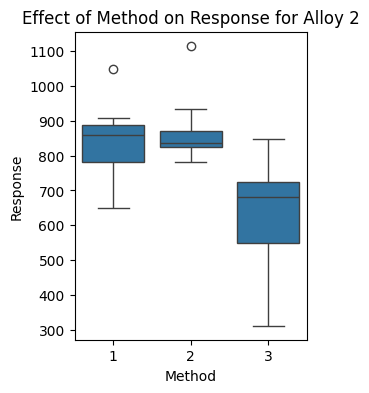

In [191]:
plt.figure(figsize=(3,4))
sns.boxplot(data=df2, x='Method', y='Response');
plt.title('Effect of Method on Response for Alloy 2');

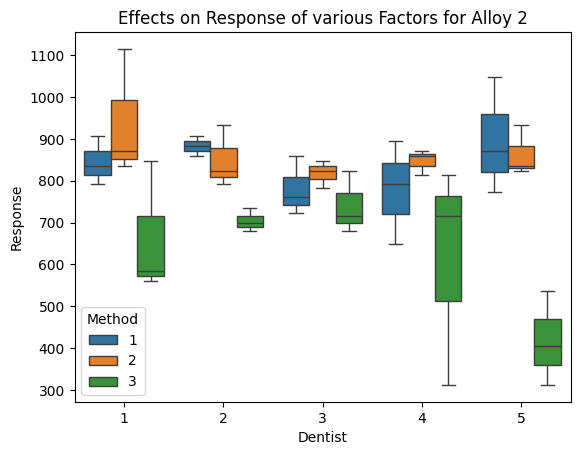

In [192]:
sns.boxplot(data=df2, x='Dentist', y='Response', hue='Method');
plt.title('Effects on Response of various Factors for Alloy 2');

### Assumption Testing

#### Shapiro-Wilk's Test for Normality

> $H_0$ : Response levels of hardness follows a Normal distribution.\
\
> $H_1$ : Response levels of hardness does not follow a Normal distribution.
> 
> Level of Significance $\alpha = 0.05$

In [196]:
w, p_value = stats.shapiro(df1['Response'])
print(f'The p-value is: {p_value}')

The p-value is: 1.1945070582441986e-05


*Since p-value $< \alpha$, we reject the Null hypothesis. The dependent variable Response does not follow a Normal distribution.*

#### Levene's test for Homogeneity of Variance

In [198]:
from scipy.stats import levene

**For Dentist factor:**

> $H_0$ : Variances of Responses from all Dentists are equal. \
\
> $H_1$ : At least one variance is different from the rest.
> 
> Level of Significance $\alpha = 0.05$

In [202]:
d1 = df['Response'][df['Dentist']==1]
d2 = df['Response'][df['Dentist']==2]
d3 = df['Response'][df['Dentist']==3]
d4 = df['Response'][df['Dentist']==4]
d5 = df['Response'][df['Dentist']==5]

In [203]:
statistic, p_value = stats.levene(d1,d2,d3,d4,d5)

In [205]:
print(f'The p-value is: {round(p_value,4)}')

The p-value is: 0.0079


*Since p-value $< \alpha$, we reject the Null hypothesis. Not all Dentist Response variances are equal. At least one variance is different from the rest.*

**For Method factor:**

> $H_0$ : Variances of Responses from all Methods are equal. \
\
> $H_1$ : At least one variance is different from the rest.
> 
> Level of Significance $\alpha = 0.05$

In [209]:
m1 = df['Response'][df['Method']==1]
m2 = df['Response'][df['Method']==2]
m3 = df['Response'][df['Method']==3]

In [210]:
statistic, p_value = stats.levene(m1,m2,m3)

In [211]:
print(f'The p-value is: {round(p_value,4)}')

The p-value is: 0.0041


*Since p-value $< \alpha$, we reject the Null hypothesis. Not all Method Response variances are equal. At least one variance is different from the rest.*

In [119]:
import pingouin as pg

### 4.1 How does the hardness of implants vary depending on dentists?

#### **Alloy 1**

> $H_0$ : $\mu_1 = \mu_2 =\mu_3 = \mu_4 = \mu_5$ The means hardness of implants by all Dentists are equal for Alloy 1. \
\
> $H_1$ : At least one mean is different from the rest. \
\
Level of Significance $\alpha = 0.05$

In [212]:
pg.anova(df1, dv='Response', between='Dentist', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Dentist,106683.688889,4,26670.922222,1.977112,0.116567,0.165074
1,Within,539593.555556,40,13489.838889,NaN,NaN,NaN


**p-value is 0.1165**

**Since p-value $> \alpha$, we fail to reject the Null hypothesis. All means of hardness of implants by all Dentists are equal for Alloy 1.**

#### **Alloy 2**

> $H_0$ : $\mu_1 = \mu_2 =\mu_3 = \mu_4 = \mu_5$ The means hardness of implants by all Dentists are equal for Alloy 2. \
\
> $H_1$ : At least one mean is different from the rest. \
\
Level of Significance $\alpha = 0.05$

In [213]:
pg.anova(df2, dv='Response', between='Dentist', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Dentist,5.679791e+04,4,14199.477778,0.524835,0.718031,0.049866
1,Within,1.082205e+06,40,27055.122222,NaN,NaN,NaN


**p-value is 0.7180**

**Since p-value $> \alpha$, we fail to reject the Null hypothesis. All means of hardness of implants by all Dentists are equal for Alloy 2.**

### 4.2 How does the hardness of implants vary depending on methods?

#### **Alloy 1**

> $H_0$ : $\mu_1 = \mu_2 =\mu_3$ The means hardness of implants by all Methods are equal for Alloy 1. \
\
> $H_1$ : At least one mean is different from the rest. \
\
Level of Significance $\alpha = 0.05$

In [214]:
pg.anova(df1, dv='Response', between='Method', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Method,148472.177778,2,74236.088889,6.263327,0.004163,0.229734
1,Within,497805.066667,42,11852.501587,NaN,NaN,NaN


**p-value is 0.0041**

**Since p-value $< \alpha$, we reject the Null hypothesis. At least one mean is different from the rest for Alloy 1.**

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [225]:
m_comp = pairwise_tukeyhsd(df1['Response'], df1['Method'],0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


**Pairs 1-3 and 2-3 differ in their means for Alloy 1.**

#### **Alloy 2**

> $H_0$ : $\mu_1 = \mu_2 =\mu_3$ The means hardness of implants by all Methods are equal for Alloy 2. \
\
> $H_1$ : At least one mean is different from the rest. \
\
Level of Significance $\alpha = 0.05$

In [226]:
pg.anova(df2, dv='Response', between='Method', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Method,499640.4,2,249820.200000,16.4108,0.000005,0.438665
1,Within,639362.4,42,15222.914286,NaN,NaN,NaN


**p-value is 0.000005**

**Since p-value $< \alpha$, we reject the Null hypothesis. At least one mean is different from the rest for Alloy 2.**

In [227]:
m_comp = pairwise_tukeyhsd(df2['Response'], df2['Method'],0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


**Pairs 1-3 and 2-3 differ in their means for Alloy 2.**

In [229]:
from statsmodels.graphics.factorplots import interaction_plot

### 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

#### Alloy 1

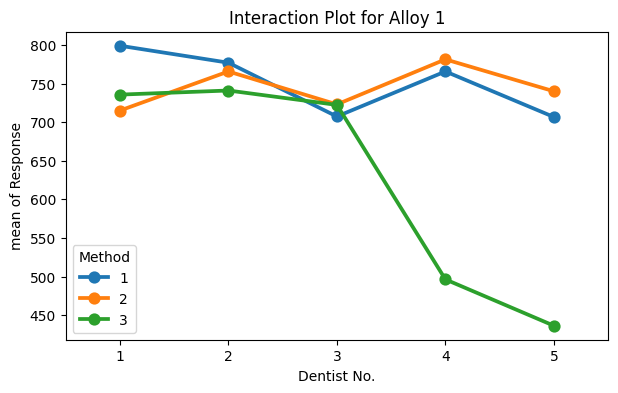

In [242]:
plt.figure(figsize=(7,4))
sns.pointplot(data=df1, x='Dentist', y='Response', hue='Method', errorbar=None, estimator='mean');
plt.title('Interaction Plot for Alloy 1')
plt.ylabel('mean of Response')
plt.xlabel('Dentist No.');

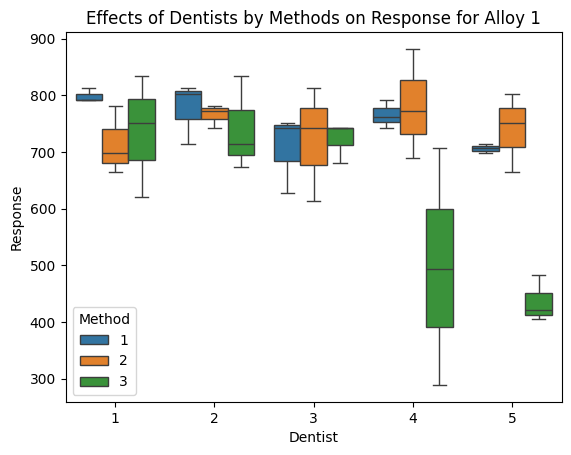

In [189]:
sns.boxplot(data=df1, x='Dentist', y='Response', hue='Method');
plt.title('Effects of Dentists by Methods on Response for Alloy 1');

#### Alloy 2

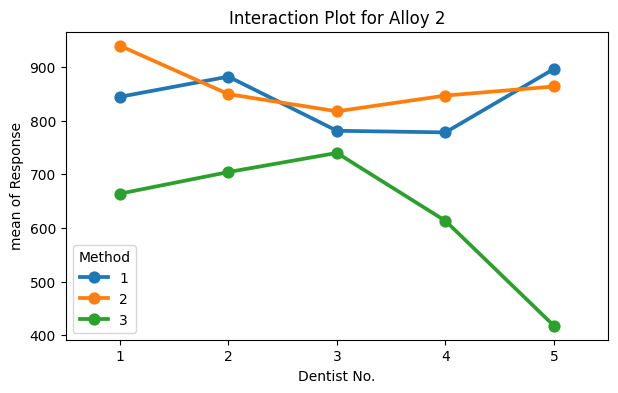

In [244]:
plt.figure(figsize=(7,4))
sns.pointplot(data=df2, x='Dentist', y='Response', hue='Method', errorbar=None, estimator='mean');
plt.title('Interaction Plot for Alloy 2')
plt.ylabel('mean of Response')
plt.xlabel('Dentist No.');

### 4.4 How does the hardness of implants vary depending on dentists and methods together?

#### Alloy 1

> $H_0$ : There is no interaction between Dentists and Methods for Alloy 1.\
\
> $H_1$ : Interaction between Dentists and Methods has an effect on the Response. \
\
Level of Significance $\alpha = 0.05$

In [120]:
pg.anova(dv='Response', between=['Dentist', 'Method'], data=df1, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Dentist,106683.688889,4,26670.922222,3.899638,0.011484,0.342084
1,Method,148472.177778,2,74236.088889,10.854287,0.000284,0.419825
2,Dentist * Method,185941.377778,8,23242.672222,3.398383,0.006793,0.475406
3,Residual,205180.000000,30,6839.333333,NaN,NaN,NaN


**p-value is 0.0067**

Since p-value $<\alpha$, we reject the Null hypothesis. Interaction between Dentists and Methods has an effect on the Response.

In [ ]:
df1['Dentist'].replace(1,'D1')
df1['Dentist'].replace(2,'D2')
df1['Dentist'].replace(3,'D3')
df1['Dentist'].replace(4,'D4')
df1['Dentist'].replace(5,'D5')

In [ ]:
df1['Method'] = df1['Method'].astype('str')

In [58]:
df1.loc[df1['Method'] == '1', 'Method'] = 'M1'
df1.loc[df1['Method'] == '2', 'Method'] = 'M2'
df1.loc[df1['Method'] == '3', 'Method'] = 'M3'

In [ ]:
df1['m+d'] = 1
df1['m+d'] = df1['m+d'].astype(str)

In [ ]:
df1['m+d'] = df1['m+d'].apply(lambda x : str(x))

In [141]:
df1['m+d'] = df1['Method'].astype(str) + df1['Dentist'].astype(str)

In [187]:
todrop = df1[df1['m+d']=='nannan']

In [190]:
df1.drop(todrop, inplace=True)

In [ ]:
df1['m+d']

In [192]:
m_comp = pairwise_tukeyhsd(df1['Response'], df1['m+d'],alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
  M1D1   M1D2     -22.0    1.0 -270.8283  226.8283  False
  M1D1   M1D3  -91.6667 0.9853  -340.495  157.1617  False
  M1D1   M1D4  -33.3333    1.0 -282.1617   215.495  False
  M1D1   M1D5  -92.3333 0.9844 -341.1617   156.495  False
  M1D1   M2D1     -84.0 0.9933 -332.8283  164.8283  False
  M1D1   M2D2  -33.3333    1.0 -282.1617   215.495  False
  M1D1   M2D3     -76.0 0.9975 -324.8283  172.8283  False
  M1D1   M2D4  -17.6667    1.0  -266.495  231.1617  False
  M1D1   M2D5     -59.0 0.9998 -307.8283  189.8283  False
  M1D1   M3D1  -63.3333 0.9996 -312.1617   185.495  False
  M1D1   M3D2     -58.0 0.9999 -306.8283  190.8283  False
  M1D1   M3D3  -76.6667 0.9972  -325.495  172.1617  False
  M1D1   M3D4 -302.6667  0.007  -551.495  -53.8383   True
  M1D1   M3D5 -362.6667 0.0007  -611.495 -113.8383   True
  M1D2   M1D3 

In [124]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [ ]:
MultiComp = MultiComparison(df1['Response'],df1['m+d']) 
print(MultiComp.tukeyhsd().summary())

In [174]:
tukey_df1 = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])

In [175]:
tukey_df1.to_csv('Alloy 1 Mix Mcomp.csv', index=False)

#### Alloy 2

> $H_0$ : There is no interaction between Dentists and Methods for Alloy 2.\
\
> $H_1$ : Interaction between Dentists and Methods has an effect on the Response. \
\
Level of Significance $\alpha = 0.05$

In [179]:
pg.anova(dv='Response', between=['Dentist', 'Method'], data=df2, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Dentist,56797.911111,4,14199.477778,1.106152,0.371833,0.128530
1,Method,499640.400000,2,249820.200000,19.461218,0.000004,0.564728
2,Dentist * Method,197459.822222,8,24682.477778,1.922787,0.093234,0.338949
3,Residual,385104.666667,30,12836.822222,NaN,NaN,NaN


In [157]:
df2.loc[df2['Dentist'] == '1', 'Dentist'] = 'D1'
df2.loc[df2['Dentist'] == '2', 'Dentist'] = 'D2'
df2.loc[df2['Dentist'] == '3', 'Dentist'] = 'D3'
df2.loc[df2['Dentist'] == '4', 'Dentist'] = 'D4'
df2.loc[df2['Dentist'] == '5', 'Dentist'] = 'D5'

In [160]:
df2.loc[df2['Method'] == 1, 'Method'] = 'M1'
df2.loc[df2['Method'] == 2, 'Method'] = 'M2'
df2.loc[df2['Method'] == 3, 'Method'] = 'M3'

In [ ]:
df1['Method'] = df1['Method'].astype('str')

In [58]:
df1.loc[df1['Method'] == '1', 'Method'] = 'M1'
df1.loc[df1['Method'] == '2', 'Method'] = 'M2'
df1.loc[df1['Method'] == '3', 'Method'] = 'M3'

In [ ]:
df2['m+d'] = '1'
df2['m+d']

In [ ]:
df2['m+d'] = df2['Method'] + df2['Dentist']

In [ ]:
df2['m+d']

In [168]:
m_comp = pairwise_tukeyhsd(df2['Response'], df2['m+d'],alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
  M1D1   M1D2   37.6667    1.0 -303.2292  378.5625  False
  M1D1   M1D3  -63.3333    1.0 -404.2292  277.5625  False
  M1D1   M1D4  -66.3333    1.0 -407.2292  274.5625  False
  M1D1   M1D5      52.0    1.0 -288.8958  392.8958  False
  M1D1   M2D1   95.3333  0.999 -245.5625  436.2292  False
  M1D1   M2D2       5.0    1.0 -335.8958  345.8958  False
  M1D1   M2D3     -27.0    1.0 -367.8958  313.8958  False
  M1D1   M2D4    2.3333    1.0 -338.5625  343.2292  False
  M1D1   M2D5   19.3333    1.0 -321.5625  360.2292  False
  M1D1   M3D1 -180.6667 0.8085 -521.5625  160.2292  False
  M1D1   M3D2 -140.3333 0.9635 -481.2292  200.5625  False
  M1D1   M3D3 -104.6667 0.9973 -445.5625  236.2292  False
  M1D1   M3D4 -231.3333 0.4686 -572.2292  109.5625  False
  M1D1   M3D5    -427.0 0.0049 -767.8958  -86.1042   True
  M1D2   M1D3 

In [172]:
tukey_df = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])

In [173]:
tukey_df.to_csv('Alloy 2 Mix Mcomp.csv', index=False)